In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
from simple_detector import *

In [5]:
# calibration n test cases
calibration_folder = 'camera_cal'
test_cases = 'test_images'

In [6]:
cal_set = glob.glob(calibration_folder + '/*')
test_set = glob.glob(test_cases + '/*')

# Calibration Imageset

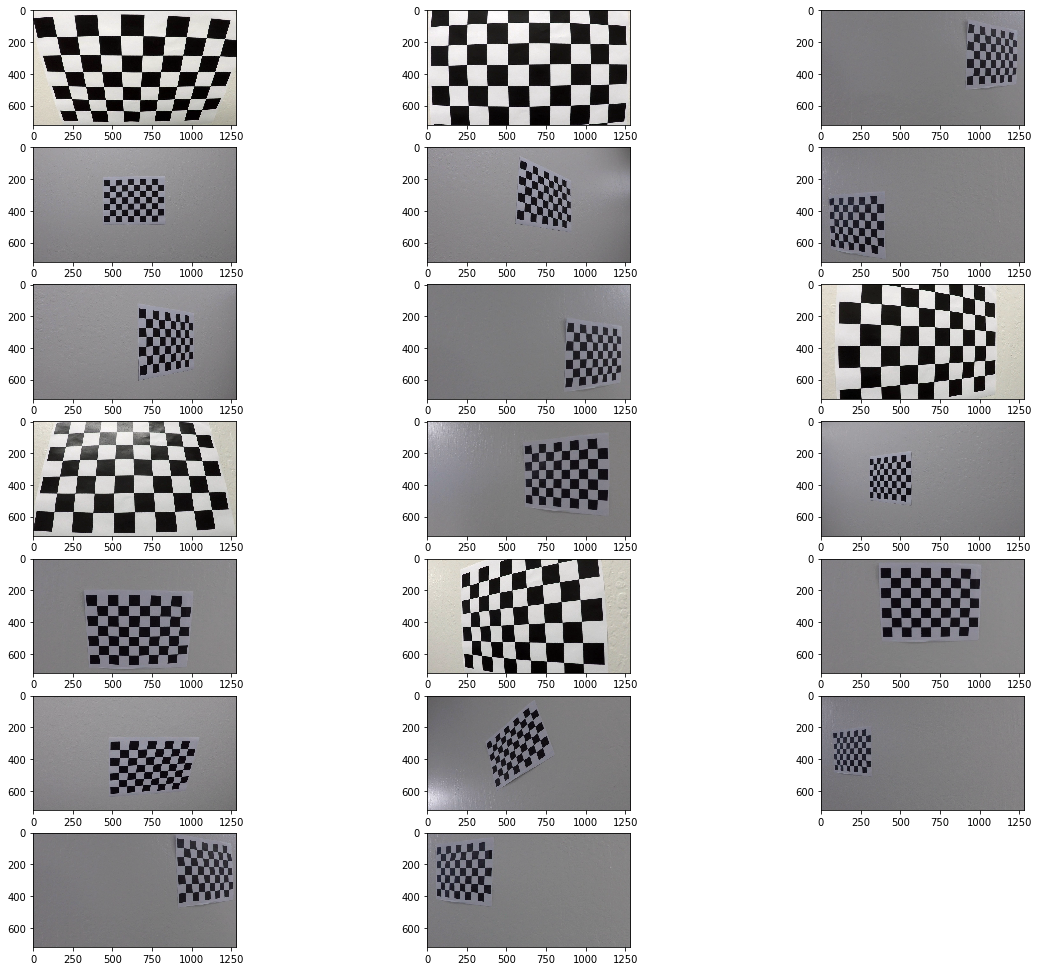

In [8]:
cal_length = len(cal_set)
plt.figure(figsize=(20,50))
for i in range(0, cal_length):
    result, size = read_video(cal_set[i])
    #gray = next(grayscale(result))
    plt.subplot(cal_length,3,i+1)
    plt.imshow(result, interpolation='none')

# Test set

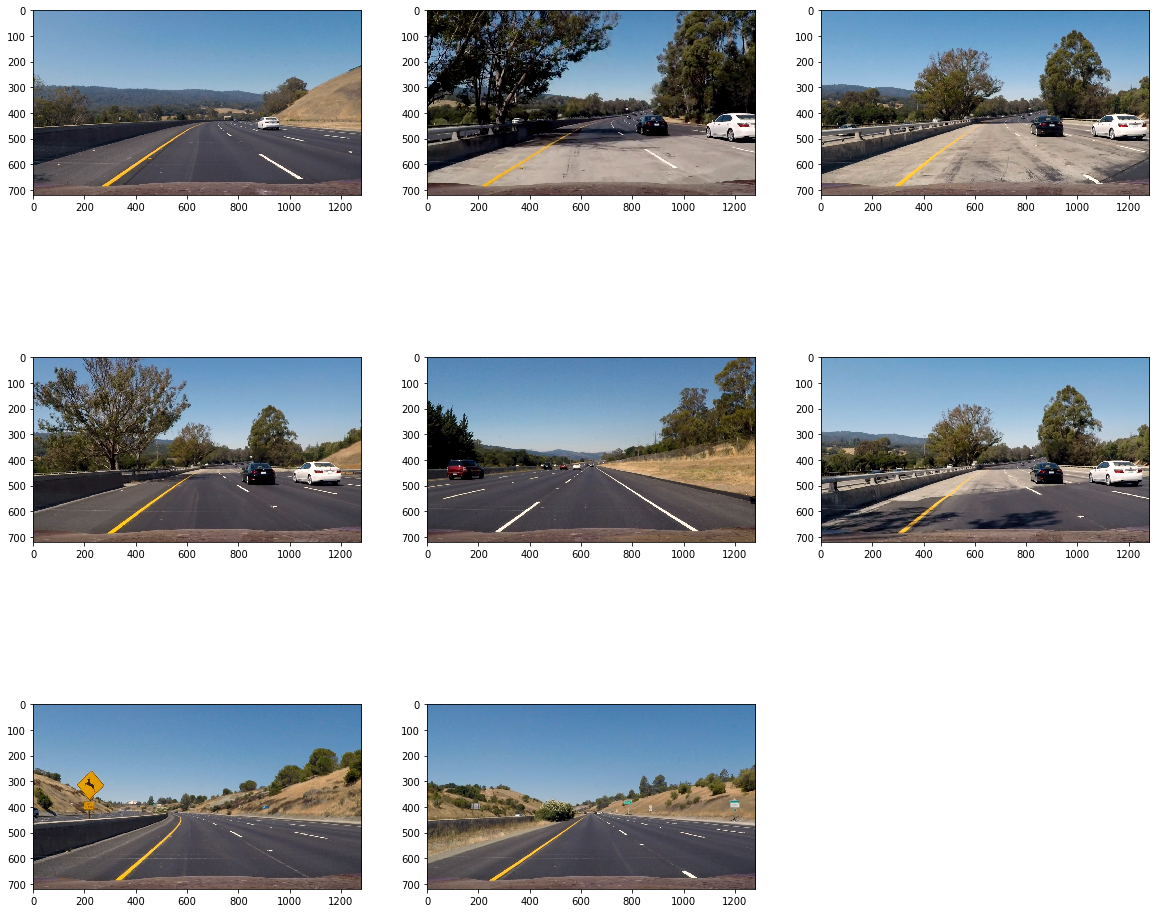

In [9]:
test_length = len(test_set)
plt.figure(figsize=(20,50))
for i in range(0, test_length):
    result, size = read_video(test_set[i])
    #gray = next(grayscale(result))
    plt.subplot(test_length,3,i+1)
    plt.imshow(result, interpolation='none')

# Test the simple detector

In [10]:
def draw_pipeline(path: str) -> np.ndarray:
    frame, fr_shape = read_video(path)
    proc_f = grayscale(frame)
    proc_f = gaussian_blur(proc_f, 5)
    proc_f = canny(proc_f, 25, 150)
    roi = region_of_interest(proc_f, np.array([[(0.1*fr_shape[1],fr_shape[0]),
                          (fr_shape[1]*0.95, fr_shape[0]), 
                          (0.55*fr_shape[1], 0.6*fr_shape[0]), 
                          (0.45*fr_shape[1],0.6*fr_shape[0])]], dtype=np.int32))
    proc_f_lines = hough_lines(roi, 2, np.pi/180, 16, 5, 50)
    final_lines = find_lines(proc_f, proc_f_lines)
    output_img = draw_lines(proc_f, final_lines)
    output_img = weighted_img(output_img, frame)
    #logger.debug('outputting: {0}'.format(type(frame)))
    
    #yield output_img
    return output_img

/home/jovyan/work/CarND-Advanced-Lane-Lines/simple_detector.py:89: RuntimeWarning: divide by zero encountered in int_scalars
  gradient = np.round(((y2-y1)/(x2-x1)), decimals = 2)


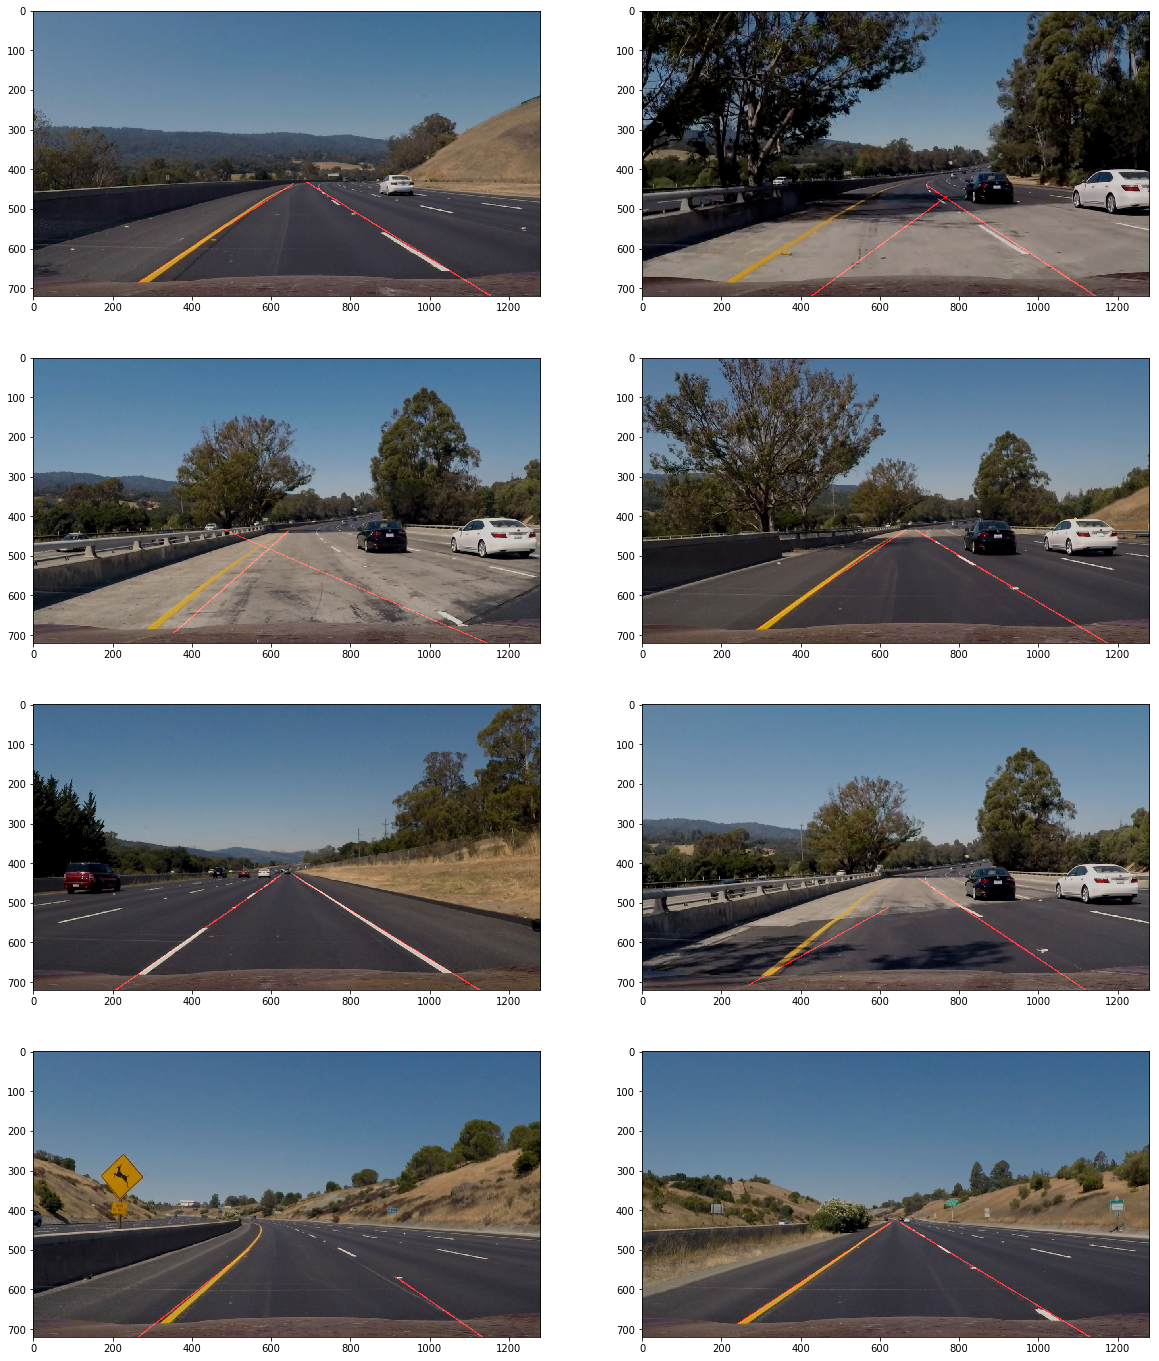

In [12]:
plt.figure(figsize=(20,50))
for i in range(0, test_length):
    #logger.info(print(test_pack[i]))
    result = draw_pipeline(test_set[i])    
    
    plt.subplot(test_length,2,i+1)
    plt.imshow(result, cmap='gray', interpolation='none')